In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import censusdata
import geopandas as gpd
from tqdm import tqdm
import geoplot as gplt #install using conda (req python 3.7+) conda install geoplot -c conda-forge 
import mapclassify as mc
import folium


dfall = pd.read_csv('all_districts.csv')
df7 = pd.read_csv('district7_311.csv')

ModuleNotFoundError: No module named 'censusdata'

Summary Statistics of D7 vs. All Other Districts

In [2]:
unfinishedAll = dfall.loc[dfall['case_status'] == 'Open']
unfinished7 = df7.loc[df7['case_status'] == 'Open']

print("Percentage of requests that were not closed in all districts outside of D7 is " + str(unfinishedAll.shape[0] / dfall.shape[0]))
print("Percentage of requests that were not closed in D7 is " + str(unfinished7.shape[0] / df7.shape[0]))

# Average Time from start to close for entire dataset of closed requests (not including D7)

def calcTime(start, end):
    date_format_str = '%Y-%m-%d %H:%M:%S'
    start = datetime.strptime(start, date_format_str)
    end =   datetime.strptime(end, date_format_str)
    diff = end-start
    diff_in_hours = diff.total_seconds() / 3600
    return diff_in_hours

closedAll = dfall.loc[dfall['case_status'] == 'Closed']

totalAll = 0
for i in range(closedAll.shape[0]):
    totalAll += calcTime(closedAll.iloc[i, 2], closedAll.iloc[i, 4])
print("Average number of hours from start to close for entire dataset of closed requests is " + str(totalAll/closedAll.shape[0]))


# Average Time from start to close for D7 of closed requests

closed7 = df7.loc[df7['case_status'] == 'Closed']

total7 = 0
for i in range(closed7.shape[0]):
    total7 += calcTime(closed7.iloc[i, 2], closed7.iloc[i, 4])
print("Average number of hours from start to close for D7 of closed requests is " + str(total7/closed7.shape[0]))

Percentage of requests that were not closed in all districts outside of D7 is 0.10664141431676306
Percentage of requests that were not closed in D7 is 0.11831628393192911
Average number of hours from start to close for entire dataset of closed requests is 276.9027821464053
Average number of hours from start to close for D7 of closed requests is 268.0899801151966


C:\Users\ryany\AppData\Local\Temp\ipykernel_19516\4020416724.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_district7 = pd.read_csv('district7_311.csv')


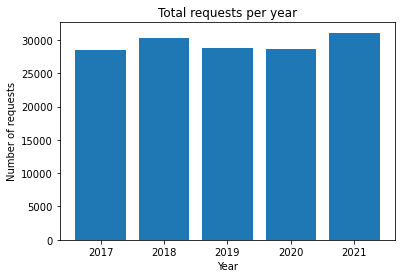

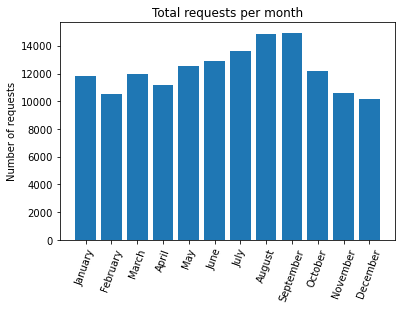

In [3]:
# Loading data of district 7 from 2017 to 2021
df_district7 = pd.read_csv('district7_311.csv')

# Extracting year and month
df_district7['year_open'] = df_district7['open_dt'].apply(lambda x: int(x.split('-')[0]))
df_district7['month_open'] = df_district7['open_dt'].apply(lambda x: int(x.split('-')[1]))

# Obtaining number of requests for D7 by year and by month
requests_per_year = []
for year in range(2017, 2022):
    requests = len(df_district7[df_district7['year_open'] == year])
    requests_per_year.append(requests)

requests_per_month = []
for month in range(1, 13):
    requests = len(df_district7[df_district7['month_open'] == month])
    requests_per_month.append(requests)

# Graphs
# Yearly
plt.bar(range(2017, 2022), requests_per_year)
plt.title('Total requests per year')
plt.xlabel('Year')
plt.ylabel('Number of requests')

plt.show()

# Monthly
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.bar(months, requests_per_month)
plt.title('Total requests per month')
plt.xticks(rotation=70)
plt.ylabel('Number of requests')

plt.show()

C:\Users\ryany\AppData\Local\Temp\ipykernel_19516\3884820580.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_5_year = pd.read_csv('2017-2021_data.csv')


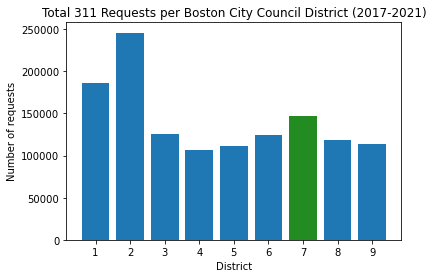

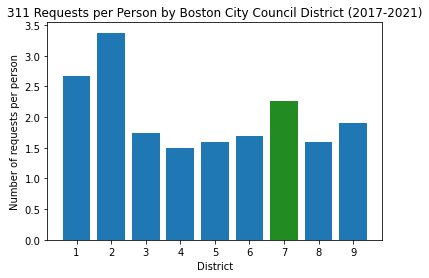

In [4]:
df_5_year = pd.read_csv('2017-2021_data.csv')

district_names = ['D1','D2','D3','D4','D5','D6','D7','D8','D9']
districts_pop = [69756, 72867, 72359, 71554, 69454, 73647, 65183, 74469, 59536]
total_pop = 628825
names_pop_dict = dict(zip(district_names,districts_pop))

district_counts = df_5_year['city_council_district'].value_counts().sort_index()
district_counts = district_counts.tail(9) #removes na and district 0

district_counts_by_pop = district_counts/districts_pop


plt.bar(district_counts.index.values, district_counts, color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue','tab:blue','forestgreen','tab:blue','tab:blue'])
plt.title('Total 311 Requests per Boston City Council District (2017-2021)')
plt.xlabel('District')
plt.ylabel('Number of requests')
plt.show()

plt.bar(district_counts_by_pop.index.values, district_counts_by_pop, color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue','tab:blue','forestgreen','tab:blue','tab:blue'])
plt.title('311 Requests per Person by Boston City Council District (2017-2021)')
plt.xlabel('District')
plt.ylabel('Number of requests per person')
plt.show()

In [5]:
def calcTime(start, end):
    date_format_str = '%Y-%m-%d %H:%M:%S'
    start = datetime.strptime(start, date_format_str)
    end =   datetime.strptime(end, date_format_str)
    diff = end-start
    diff_in_hours = diff.total_seconds() / 3600
    return diff_in_hours


closedAll = dfall.loc[dfall['case_status'] == 'Closed']
closed7 = df7.loc[df7['case_status'] == 'Closed']


parkingAll = closedAll[closedAll['type'] == 'Graffiti Removal']
#^^ Fill above line with desired type to filter by ^^
totalAll = 0
for i in tqdm(range(parkingAll.shape[0])):
    totalAll += calcTime(parkingAll.iloc[i, 2], parkingAll.iloc[i, 4])
print("Average number of hours from start to close for entire dataset of closed requests is " + str(totalAll/parkingAll.shape[0]))

parking7 = closed7[closed7['type'] == 'Graffiti Removal']
#^^ Fill above line with desired type to filter by ^^
total7 = 0
for i in tqdm(range(parking7.shape[0])):
    total7 += calcTime(parking7.iloc[i, 2], parking7.iloc[i, 4])
print("Average number of hours from start to close for D7 of closed requests is " + str(total7/parking7.shape[0]))

100%|██████████| 13748/13748 [00:01<00:00, 8262.31it/s]


Average number of hours from start to close for entire dataset of closed requests is 1783.3772889995985


100%|██████████| 1699/1699 [00:00<00:00, 9017.66it/s]

Average number of hours from start to close for D7 of closed requests is 1574.4526919429748


C:\Users\ryany\AppData\Local\Temp\ipykernel_19516\898578575.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_district7 = pd.read_csv('district7_311.csv')
C:\Users\ryany\AppData\Local\Temp\ipykernel_19516\898578575.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rest = pd.read_csv('all_districts.csv')


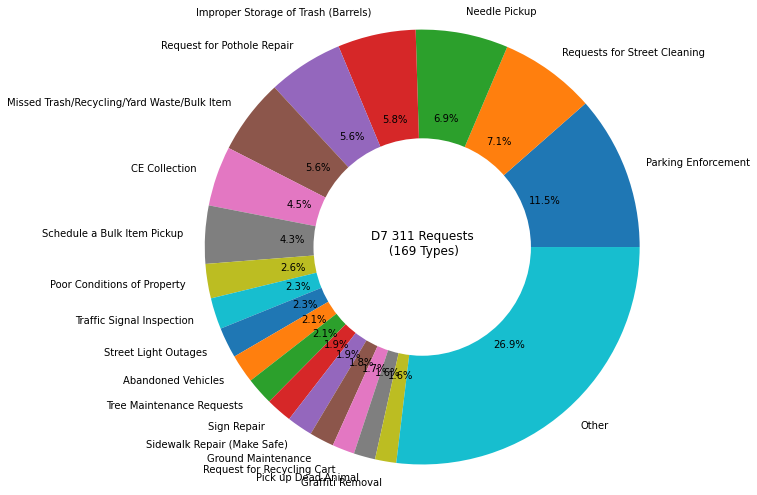

In [6]:
df_district7 = pd.read_csv('district7_311.csv')
df_rest = pd.read_csv('all_districts.csv')

# Generate relative frequencies of type of 3.11 requests D7
type_frequencies = df_district7['type'].value_counts(normalize='true').head(19)
complement = 1 - type_frequencies.sum()
type_frequencies['Other'] = complement

fig, ax = plt.subplots()
ax.pie(type_frequencies, labels=type_frequencies.keys(), autopct='%1.1f%%', radius=2)
fig.set_size_inches(5,5)
circle = plt.Circle(xy=(0,0), radius=1, facecolor='white')
plt.gca().add_artist(circle)
ax.set_title('D7 311 Requests\n (169 Types)', y=0.45)

plt.show()

Request Analysis: District 7

During the last 5 years, District 7 has had 169 different types of requests filed. However 19 of these represent aroun 73% of the total requests. Parking enforcement requests tops the list with 11.5% of all requests, followed by requests for street cleaning, Needle pickup, improper storage of trash, requests for potholerepair, and missed items that represent at least 5% of the requests each. 


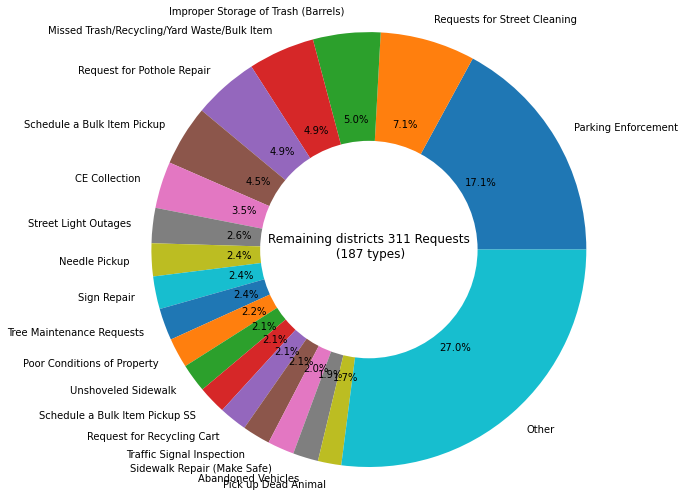

In [7]:
# Generate relative frequencies of type of 3.11 requests for the rest of the districts as a whole
type_frequencies = df_rest['type'].value_counts(normalize='true').head(19)
complement = 1 - type_frequencies.sum()
type_frequencies['Other'] = complement

fig, ax = plt.subplots()
ax.pie(type_frequencies, labels=type_frequencies.keys(), autopct='%1.1f%%', radius=2)
fig.set_size_inches(5,5)
circle = plt.Circle(xy=(0,0), radius=1, facecolor='white')
plt.gca().add_artist(circle)
ax.set_title('Remaining districts 311 Requests\n (187 types)', y=0.45)

plt.show()

Requests Analysis: Remaining Districts

Grouping the rest of the districts as a whole, we find that there is slightly more variety, with 18 more types of requests compared to D7's, but again aroun 73% of all requests are contained in the top 19 types. And consistent with D7, Parking enforcement and requests for street cleaning are the top 7 types of requests, with 17.1% and 7.1% of the total requests.

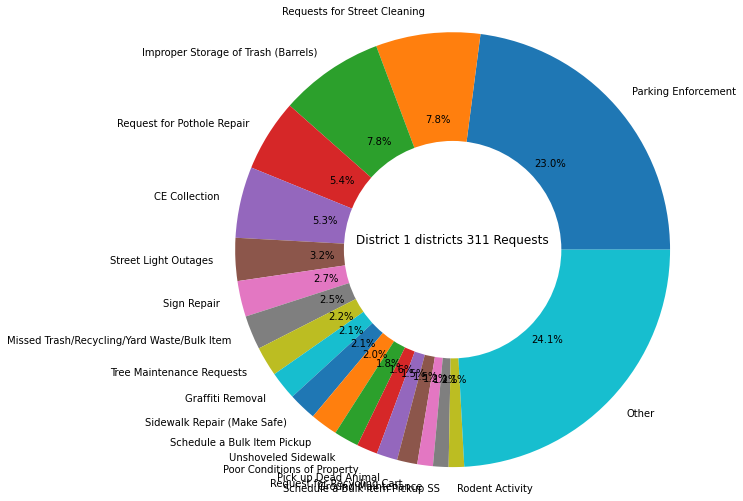

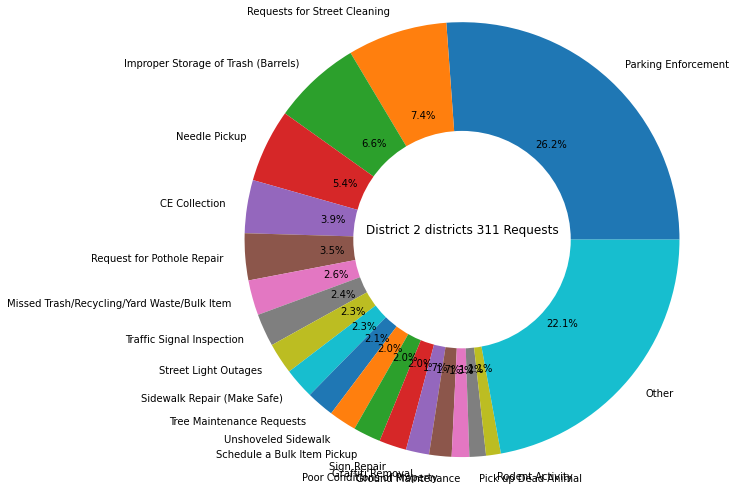

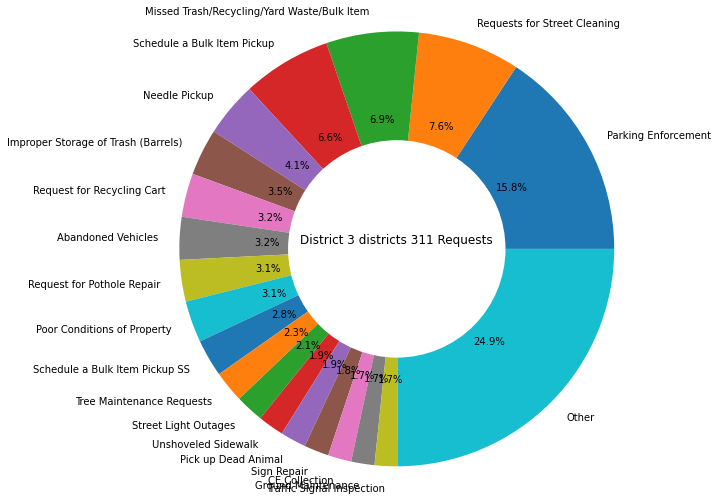

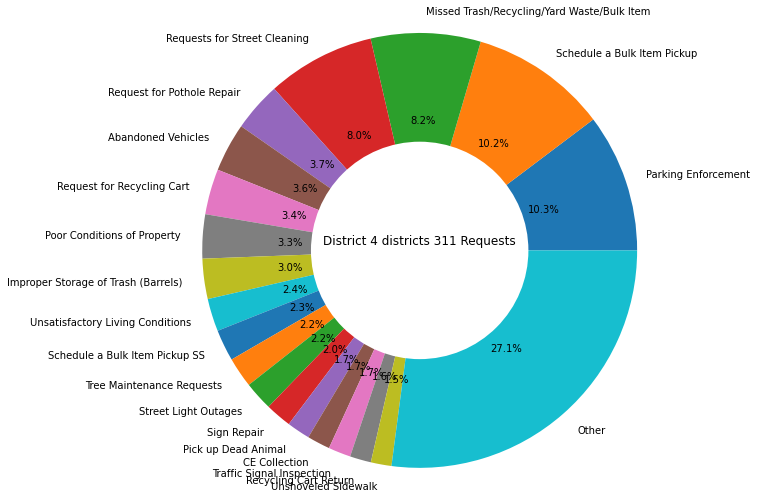

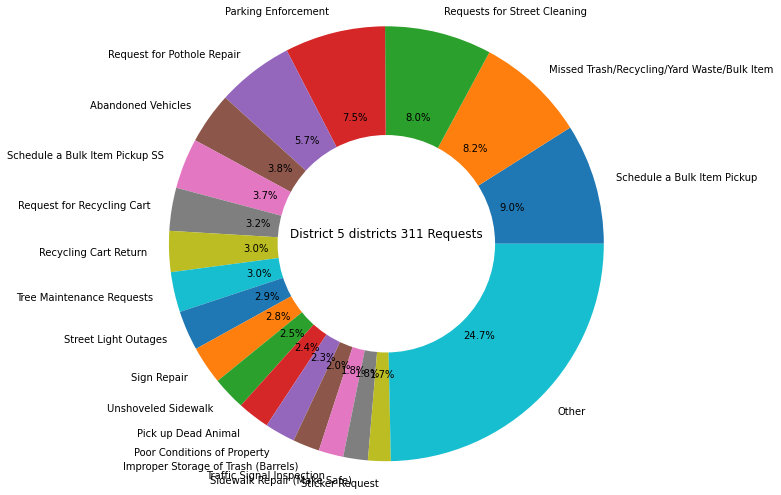

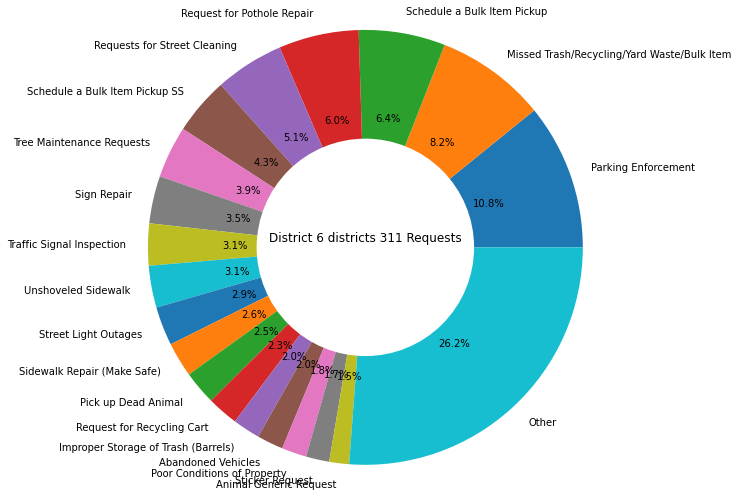

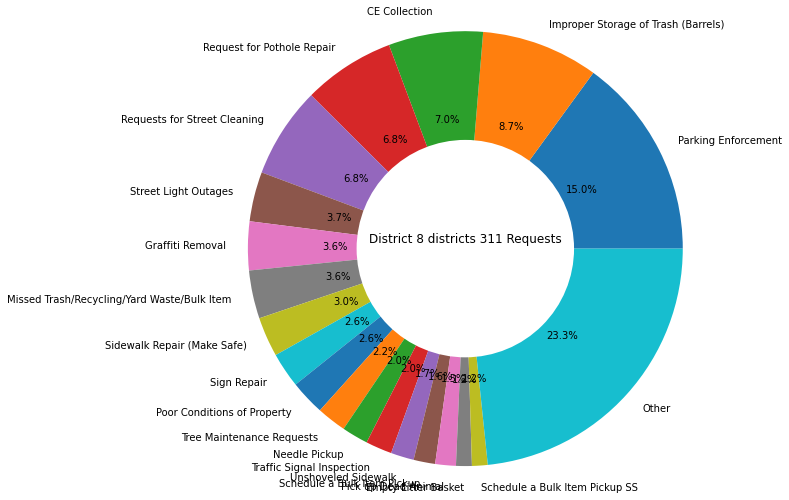

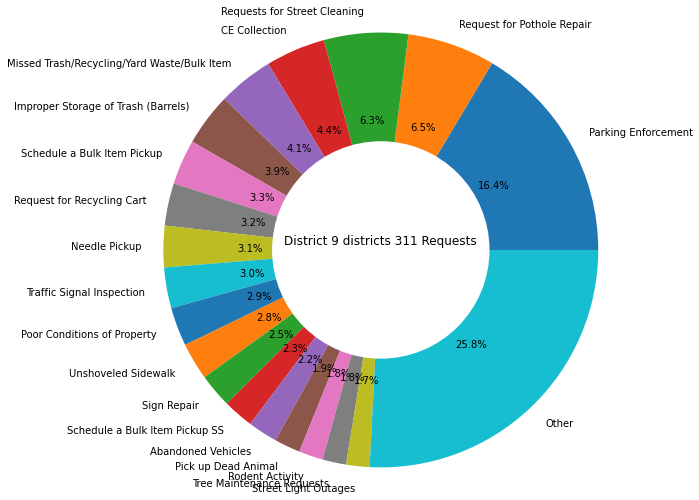

In [8]:
# Generate relative frequencies of type of 3.11 requests for each of the remaining districts
def graph_types(district):
    mask = df_rest['city_council_district'] == str(district)
    type_frequencies = df_rest[mask]['type'].value_counts(normalize='true').head(19)
    complement = 1 - type_frequencies.sum()
    type_frequencies['Other'] = complement

    fig, ax = plt.subplots()
    ax.pie(type_frequencies, labels=type_frequencies.keys(), autopct='%1.1f%%', radius=2)
    fig.set_size_inches(5,5)
    circle = plt.Circle(xy=(0,0), radius=1, facecolor='white')
    plt.gca().add_artist(circle)
    ax.set_title('District ' + str(district) + ' districts 311 Requests', y=0.5)
    plt.show()
    
# Generate graphs for each district individually
for d in range(1, 10):
    if d != 7:
        graph_types(d)

Data Setup for Choropleths

In [9]:
def calcTime(row):
    try:
        start=row[2]
        end=row[4]
        date_format_str = '%Y-%m-%d %H:%M:%S'
        start = datetime.strptime(start, date_format_str)
        end =   datetime.strptime(end, date_format_str)
        diff = end-start
        diff_in_hours = diff.total_seconds() / 3600
        diff_in_days = diff_in_hours / 24 
        return diff_in_days
    except:
        return np.NaN
        

gdf = gpd.read_file("tl_2015_25_tract/tl_2015_25_tract.shp")
gdf = gdf.rename(columns={"TRACTCE": "Tract"})
entire_dataset = pd.concat([dfall, df7])

entire_dataset['year_open'] = entire_dataset['open_dt'].apply(lambda x: int(x.split('-')[0]))
entire_dataset['open_time']= entire_dataset.apply(calcTime, axis=1)
entire_dataset.dropna(subset=['longitude', 'open_time', 'latitude', 'year_open'])

import censusdata 

#income data: MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) --> B19013_001E.  Maybe we want other columns like MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)	? 
census_data = censusdata.download('acs5', 2015,
           censusdata.censusgeo([('state', '25'),
                                 ('county', '025'),
                                 ('tract', '*')]),
          ['B02001_001E', 'B02001_002E', 'B02001_003E',
           'B02001_004E', 'B02001_005E', 'B02001_006E', 
           'B02001_007E', 'B02001_008E', 'B02001_009E', 'B02001_010E','B19013_001E']) #                                 
column_names = ['Total_race', 'White', 'African_American', 'American_Indian', 'Asian', 'Native Hawaiian', 'Other_race', 'Two_or_more_races', 'Two_or_more_including_other', 'Two_or_more_excluding_other', 'Median_household_income'] #column3 is black or african american, 4 is American Indian and Alaska Native, 'Native Hawaiian or Pacific Islander, 
census_data.columns = column_names

# Add a Tract column from the original index
census_data.reset_index(inplace=True)
census_data['index'] = census_data['index'].astype(str)
census_data['Tract'] = census_data['index'].str[-6:]
census_data.set_index('index', inplace=True)

In [10]:
#merge census data with gdf --> check bc census data has data for suffolk county and gdf has data for MA. If needed can remove county field from the download function
df  = gdf.merge(census_data, on='Tract', how='left')
merged_gdf = gpd.GeoDataFrame(df)
entire_dataset_geopoints = entire_dataset.copy()
entire_dataset_geopoints['geometry'] = gpd.points_from_xy(entire_dataset.longitude,entire_dataset.latitude)
entire_dataset_geopoints_geo = gpd.GeoDataFrame(entire_dataset_geopoints)
entire_dataset_spat_joined = entire_dataset_geopoints_geo.sjoin(merged_gdf, how="left", predicate='within')
entire_dataset_spat_joined.rename(columns={"geometry": "geometry_p"}, inplace=True)
polymapset = entire_dataset_spat_joined.merge(gdf[['Tract','geometry']], on='Tract', how='left')
polymapset_d7 = polymapset[polymapset['city_council_district'] == 7]

Choropleths & Associated Data Tables

In [11]:
import folium
import geoplot as gplt 
m = folium.Map(location=[42.3601, -71.0589]) #for black and white:  tiles="Stamen Toner"

polymapset_d7_tract = polymapset_d7.groupby('Tract', as_index=False)['open_time'].median()


folium.Choropleth(
    geo_data='https://bostonopendata-boston.opendata.arcgis.com/datasets/boston::census-2010-tracts.geojson?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D',
    name="choropleth",
    data=polymapset_d7_tract,
    columns=["Tract", "open_time"],
    key_on='properties.TRACTCE10',
    fill_color="OrRd",
    fill_opacity=0.9,
    nan_fill_opacity = 0, 
    line_opacity=0.2,
    legend_name="Request Open Time (In Days)",
).add_to(m)

folium.LayerControl().add_to(m)

m.save("map_1.html")
m


In [12]:
#Create a df of total request counts per tract
request_count_d7 = pd.DataFrame(polymapset_d7['Tract'].value_counts(), index=None)
request_count_d7.reset_index(inplace=True)
rename_dict = {'index': 'Tract',
        'Tract': 'Request Count'}
request_count_d7.rename(columns=rename_dict,
          inplace=True)
# Drop first row (not in D7)
request_count_d7.drop(index=request_count_d7.index[0], 
        axis=0, 
        inplace=True)
# request_count_d7.to_csv('Request_count_table.csv')
request_count_d7.head(20)        

,Tract,Request Count
1,070800,9893
2,070900,9252
3,080100,7225
4,010500,7130
5,081400,6838
6,081800,5528
7,081700,5249
8,080401,4854
9,090400,4851
10,082100,4628


In [13]:
polymapset_d7_sorted = polymapset_d7_tract.sort_values(by=['open_time'], ascending=False)
polymapset_d7_sorted.rename(columns={'open_time': 'Open Time (Days)'}, inplace=True)
polymapset_d7_sorted = polymapset_d7_sorted.reset_index(drop=True)
# polymapset_d7_sorted.to_csv('Open_time_table.csv')
polymapset_d7_sorted.head(20)

,Tract,Open Time (Days)
0,980300,1.678929
1,090400,0.956620
2,081700,0.912060
3,082000,0.888310
4,120301,0.877587
5,081900,0.863964
6,010300,0.803304
7,082100,0.800532
8,080801,0.785527
9,081800,0.728993


In [14]:
import folium
m2 = folium.Map(location=[42.3601, -71.0589]) #for black and white:  tiles="Stamen Toner"

#entire_dataset.dropna(subset=['longitude', 'open_time', 'latitude', 'year_open', 'tract'])

folium.Choropleth(
    geo_data='https://bostonopendata-boston.opendata.arcgis.com/datasets/boston::census-2010-tracts.geojson?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D',
    name="choropleth",
    data=request_count_d7,
    columns=["Tract", "Request Count"],
    key_on='properties.TRACTCE10',
    fill_color="OrRd",
    fill_opacity=0.9,
    nan_fill_opacity = 0, 
    line_opacity=0.2,
    legend_name="Number of Requests",
).add_to(m2)

folium.LayerControl().add_to(m2)

m2.save("map_2.html")
m2